In [1]:
import pandas as pd

In [2]:
# Data Collection
# !pip install pandas-datareader
import pandas_datareader as pdr

In [3]:
import os
# print(os.getenv("TINGO_KEY"))

In [4]:
# df =pdr.get_data_tiingo('AAPL', api_key=os.getenv("TINGO_KEY"))

In [34]:
# save the data in csv

# df.to_csv("AAPL.csv")

In [5]:
import pandas as pd

In [6]:
# Read the data from csv
df = pd.read_csv('AAPL.csv')

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-03-06 00:00:00+00:00,176.67,178.2500,176.13,177.910,23788506,42.048801,42.424853,41.920277,42.343931,95154024,0.0,1.0
1,AAPL,2018-03-07 00:00:00+00:00,175.03,175.8500,174.27,174.940,31703462,41.658469,41.853635,41.477583,41.637048,126813848,0.0,1.0
2,AAPL,2018-03-08 00:00:00+00:00,176.94,177.1200,175.07,175.480,23163767,42.113063,42.155905,41.667989,41.765572,92655068,0.0,1.0
3,AAPL,2018-03-09 00:00:00+00:00,179.98,180.0000,177.39,177.960,31385134,42.836607,42.841367,42.220167,42.355831,125540536,0.0,1.0
4,AAPL,2018-03-12 00:00:00+00:00,181.72,182.3900,180.21,180.290,32055405,43.250740,43.410205,42.891348,42.910389,128221620,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2023-02-27 00:00:00+00:00,147.92,149.1700,147.45,147.710,44998470,147.920000,149.170000,147.450000,147.710000,44998470,0.0,1.0
1254,AAPL,2023-02-28 00:00:00+00:00,147.41,149.0800,146.83,147.050,50546998,147.410000,149.080000,146.830000,147.050000,50546998,0.0,1.0
1255,AAPL,2023-03-01 00:00:00+00:00,145.31,147.2285,145.01,146.830,55478991,145.310000,147.228500,145.010000,146.830000,55478991,0.0,1.0
1256,AAPL,2023-03-02 00:00:00+00:00,145.91,146.7100,143.90,144.380,52279761,145.910000,146.710000,143.900000,144.380000,52279761,0.0,1.0


In [38]:
df1 = df.reset_index()['close']

In [39]:
df1

0       176.67
1       175.03
2       176.94
3       179.98
4       181.72
         ...  
1253    147.92
1254    147.41
1255    145.31
1256    145.91
1257    151.03
Name: close, Length: 1258, dtype: float64

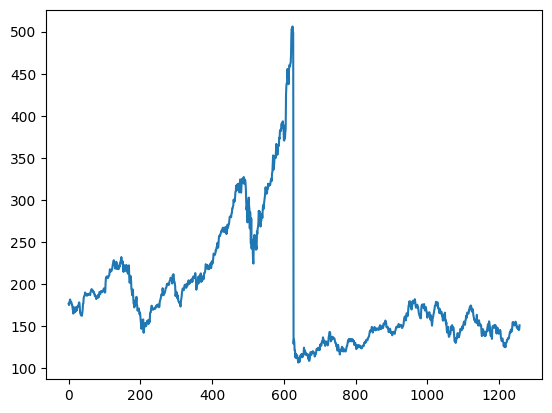

In [40]:
# !pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
# !pip install numpy
import numpy as np

In [42]:
# Scaling data in 
# !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [43]:
df1

array([[0.17490294],
       [0.17079524],
       [0.17557921],
       ...,
       [0.09635567],
       [0.09785848],
       [0.11068253]])

In [44]:
# splitting dataset into train and test  
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size


In [45]:
training_size,test_size

(817, 441)

In [46]:
train_data,test_data = df1[0:training_size], df1[training_size:len(df1),:1]

In [47]:
len(train_data), len(test_data)

(817, 441)

In [54]:
import numpy as np

# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [55]:
# reshape into x=t, t+1, t+2, t+3 and y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [58]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((716, 100), (340, 100), (716,), (340,))

In [59]:
# reshape input to be [samples,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [63]:
!pip install tensorflow
!pip install keras


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [66]:
# ctrate the STACKED LSTM model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2023-03-05 17:03:46.110169: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 17:03:46.110213: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 17:03:46.110240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f303cb05dd10): /proc/driver/nvidia/version does not exist
2023-03-05 17:03:46.110587: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 321ms/step - loss: 0.0428 - val_loss: 0.0024
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0140 - val_loss: 0.0021
Epoch 3/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0105 - val_loss: 6.8342e-04
Epoch 4/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0106 - val_loss: 3.7933e-04
Epoch 5/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0083 - val_loss: 4.8534e-04
Epoch 6/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0074 - val_loss: 7.2101e-04
Epoch 7/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0064 - val_loss: 3.6225e-04
Epoch 8/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0057 - val_loss: 2.9893e-04
Epoch 9/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0055 - val_loss: 5.1716e-04
Epoch 10/100
12/12 [==============================] - 3s 215ms/

In [71]:
import tensorflow as tf

In [72]:
tf.__version__

'2.11.0'

In [73]:
# prediction and performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [74]:
# Transform to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [76]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

253.75209946949212

In [80]:
# Test data RMSE

math.sqrt(mean_squared_error(Y_test,test_predict))

157.95506056173377

64009

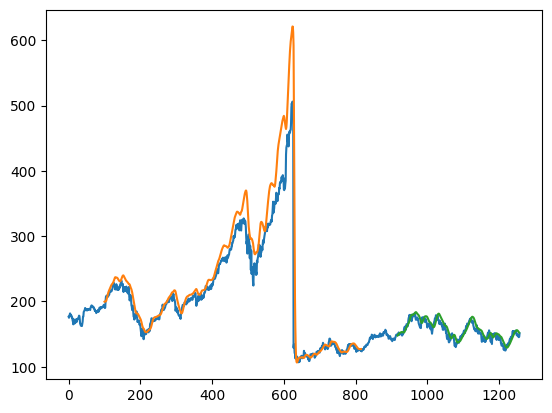

In [83]:
# plotting
# shift train prediction for plotting/
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()